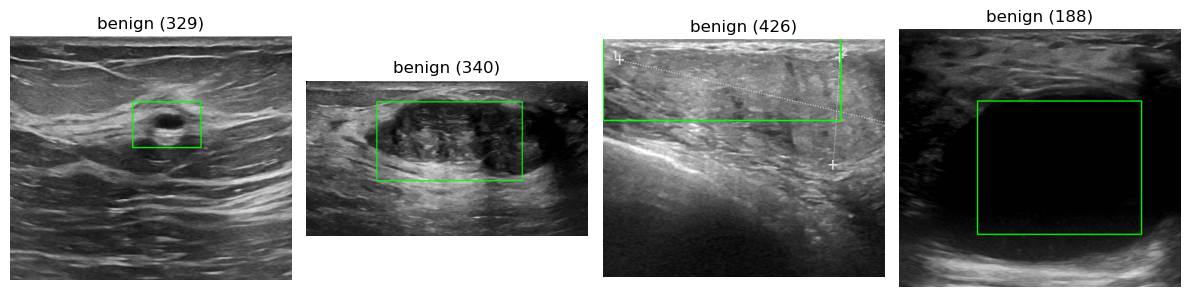

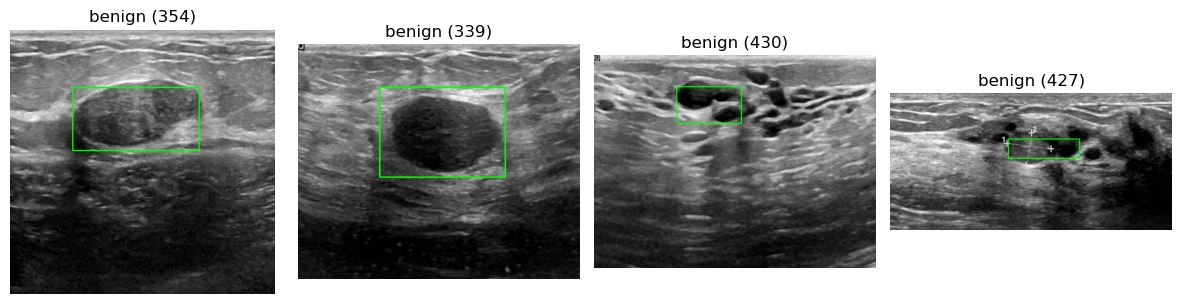

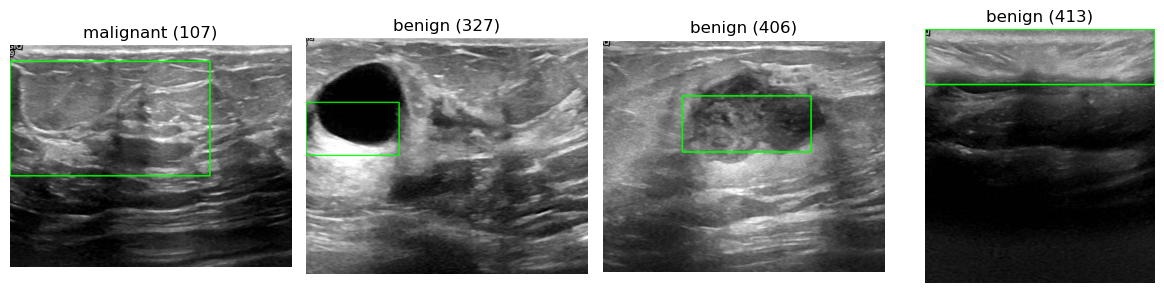

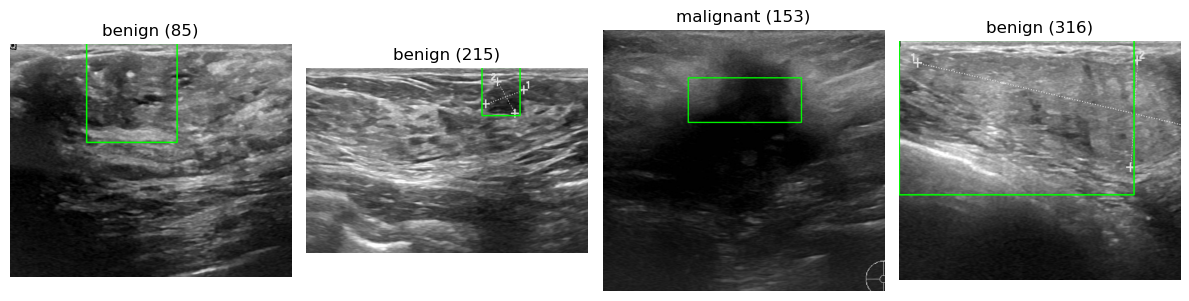

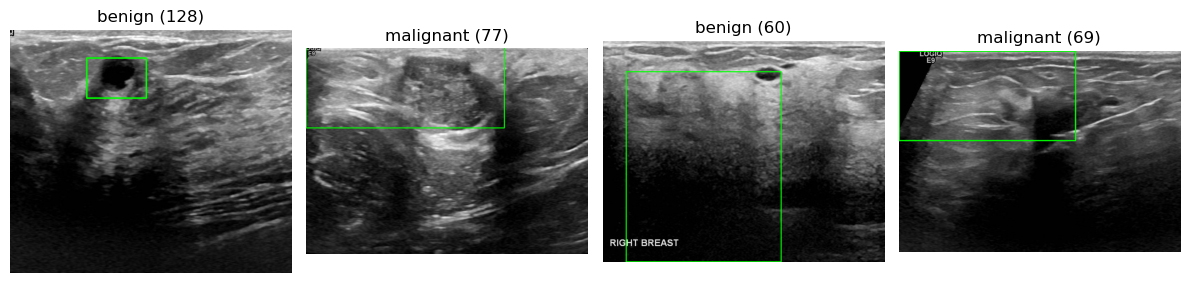

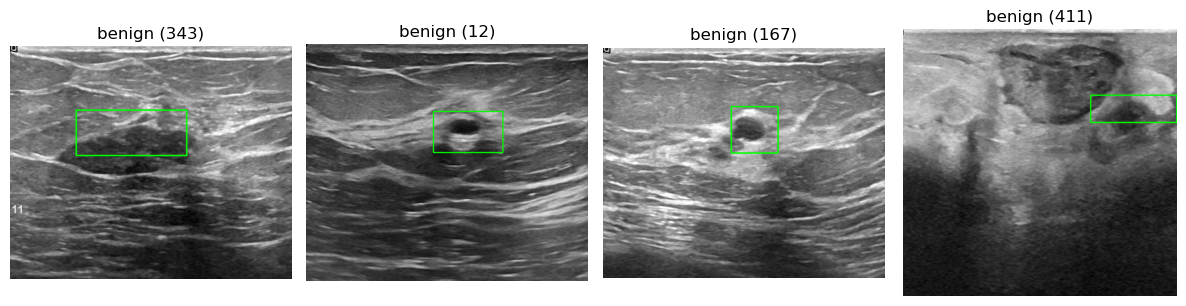

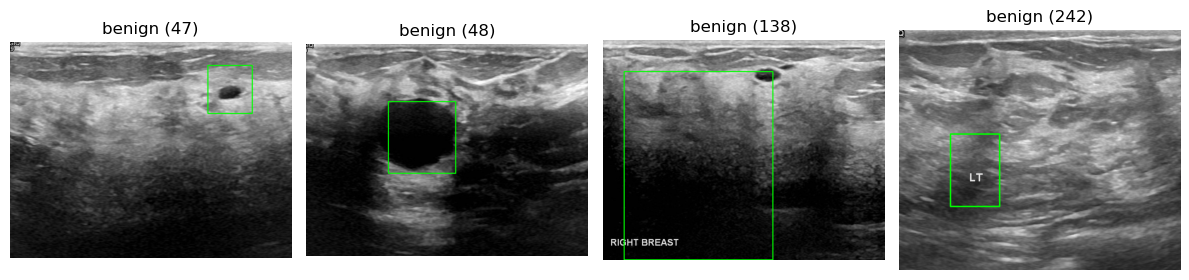

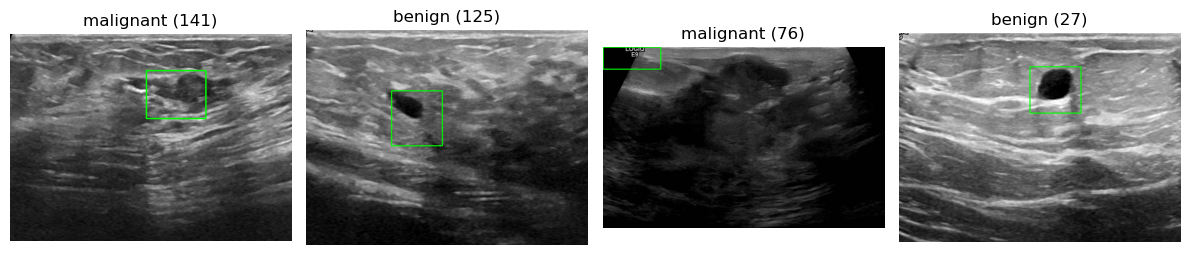

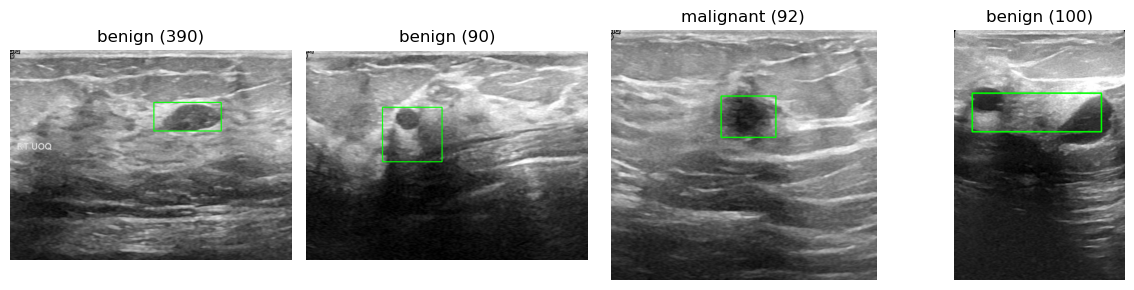

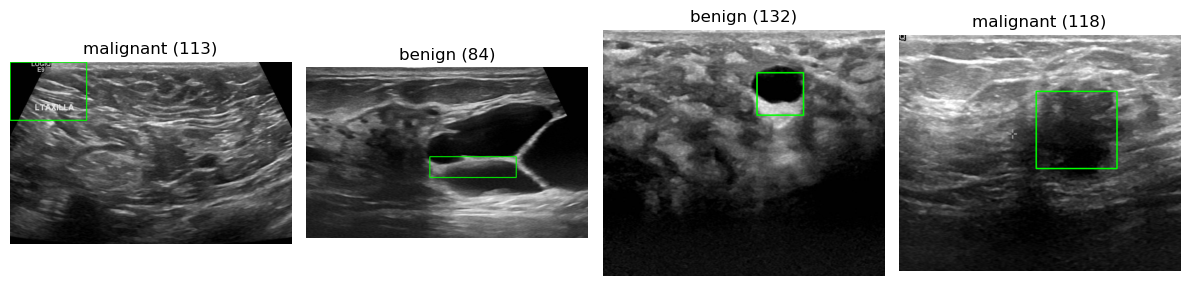

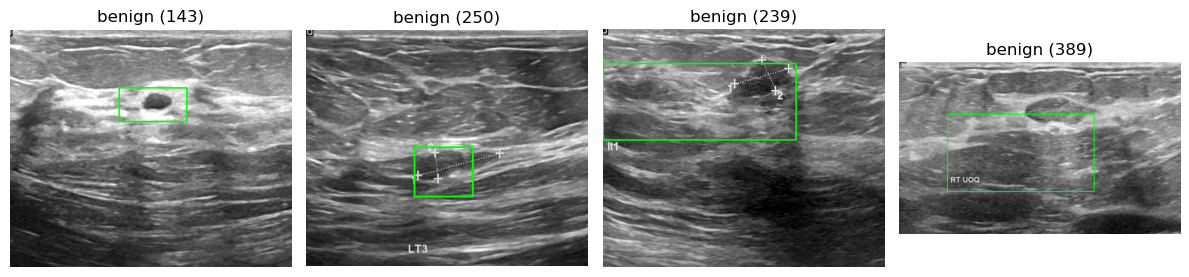

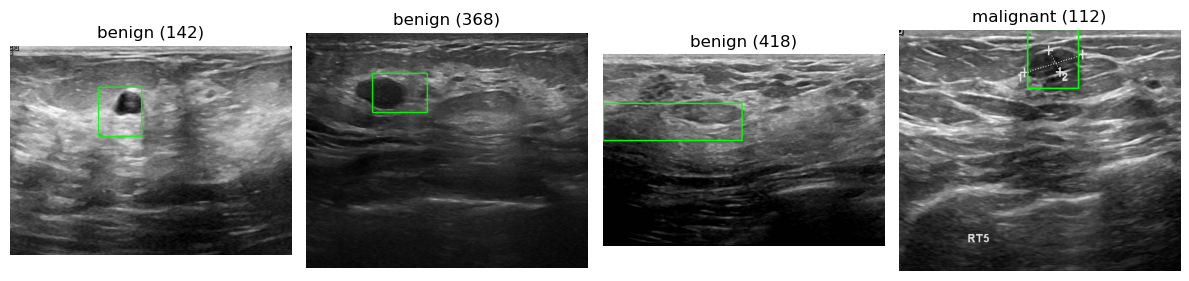

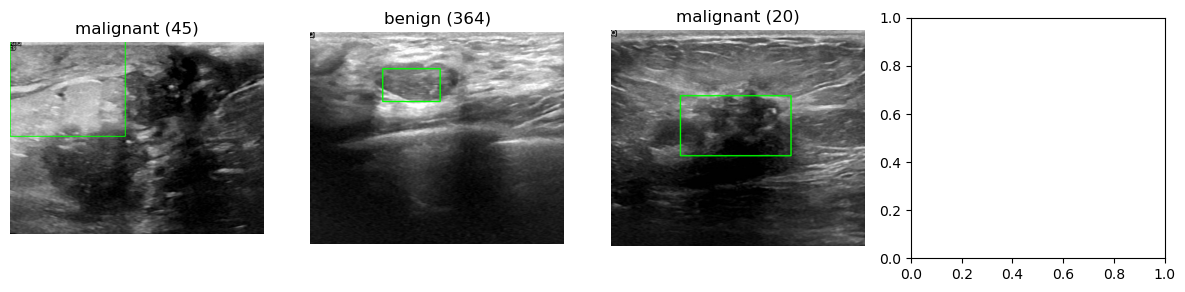

In [1]:
from convexHull import convexHullPic, convexHullPic_singleBbox
def loadBenignMalignant():
    from help.camHelper import load
    dataRoot = '/home/lintzuh@kean.edu/BUS/data/Dataset_BUSI_with_GT'
    train_images, train_labels, test_images, test_labels = load(dataRoot)
    benign_image = []
    malignant_image = []
    for item in train_images:
        if 'benign' in item:
            benign_image.append(item)
        elif 'malignant' in item:
            malignant_image.append(item)

    tumor = benign_image+malignant_image

    return tumor



def convexHullViz(camFolder):
    import os
    import matplotlib.pyplot as plt

    tumor = loadBenignMalignant()


    processed_images = []

    j = 0
    for i, filename in enumerate(tumor):
        directory, img_name = os.path.split(filename)
        a, iou = convexHullPic(camFolder, filename)
        processed_images.append((a, img_name, iou))

        if (i + 1) % 4 == 0 or (i + 1) == len(tumor):
            fig, axes = plt.subplots(1, 4, figsize=(12, 3)) # Adjust figsize as needed
            for ax, (img, name, iou) in zip(axes, processed_images):
                ax.imshow(img)
                ax.set_title(f"{name[:-4]}: {iou:.2f}")
                ax.axis('off')

            plt.tight_layout()
            plt.show()

            processed_images = []
        # j+=1

        # if j==20:
        #     break
def convexHullVisSave(camFolder):
    import os
    import matplotlib.pyplot as plt
    import cv2
    import random
    random.seed(42)


    tumor = loadBenignMalignant()

    selected_images = random.sample(tumor, int(len(tumor) * 0.10))

    processed_images = []
    saveDir = 'convexViz'
    os.makedirs(saveDir, exist_ok=True)
    
    for i, filename in enumerate(selected_images):
        directory, img_name = os.path.split(filename)
        a = convexHullPic_singleBbox(camFolder, filename)
        processed_images.append((a, img_name))

        if (i + 1) % 4 == 0 or (i + 1) == len(selected_images):
            fig, axes = plt.subplots(1, 4, figsize=(12, 3)) # Adjust figsize as needed
            for ax, (img, name) in zip(axes, processed_images):
                ax.imshow(img)
                ax.set_title(name[:-4])
                ax.axis('off')

            plt.tight_layout()
            plt.show()

            processed_images = []







if __name__ == '__main__':
    convexHullVisSave('/data/lintzuh/BUS/Swin-Transformer/gradCamResult')